mengubah data dalam bentuk numerikal menjadi data kategorikal/interval

terdapat 2 metode dalam binning, yaitu :
1. Equal Interval Binning  = membagi binnig dengan interval yang sama (jumlah tiap bin tidak sama,ditentukan dalam pengelompokan)
2. Equal Frequensi Binning = membagi binning dengan frequensi yang sama (jumlah tiap bin sama)

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer # melakukan transformasi (fit transform = transformer)
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile

# Utilities
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

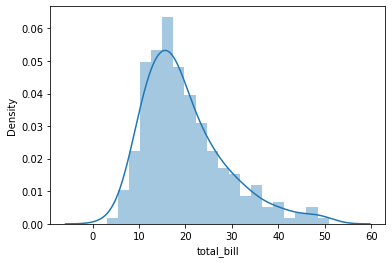

In [3]:
sns.distplot(tips['total_bill'],bins=20)

persebaran data cenderung tidak normal, right skew

In [28]:
tips['total_bill eqfreq']=pd.qcut(tips['total_bill'],5) # Dibagi 5 bin
tips['total_bill eqfreq encode']=pd.qcut(tips['total_bill'],5,labels=range(1,6))

In [5]:
tips['total_bill eqint']=pd.cut(tips['total_bill'],5) # Dibagi 5 bin
tips['total_bill eqint encode']=pd.cut(tips['total_bill'],5,labels=range(1,6))

In [29]:
tips[['total_bill eqfreq','total_bill eqfreq encode','total_bill eqint','total_bill eqint encode']]

,total_bill eqfreq,total_bill eqfreq encode,total_bill eqint,total_bill eqint encode
0,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,"(19.818, 26.098]",4,"(22.166, 31.714]",3
...,...,...,...,...
239,"(26.098, 50.81]",5,"(22.166, 31.714]",3
240,"(26.098, 50.81]",5,"(22.166, 31.714]",3
241,"(19.818, 26.098]",4,"(22.166, 31.714]",3
242,"(16.222, 19.818]",3,"(12.618, 22.166]",2


### Jika ingin merubah label

In [31]:
tips['total_bill eqfreq']=pd.qcut(tips['total_bill'],5,labels=['very low','low','medium','high','very high']) # Dibagi 5 bin
tips['total_bill eqfreq encode']=pd.qcut(tips['total_bill'],5,labels=range(1,6))

In [32]:
tips[['total_bill eqfreq','total_bill eqfreq encode','total_bill eqint','total_bill eqint encode']]

,total_bill eqfreq,total_bill eqfreq encode,total_bill eqint,total_bill eqint encode
0,medium,3,"(12.618, 22.166]",2
1,very low,1,"(3.022, 12.618]",1
2,high,4,"(12.618, 22.166]",2
3,high,4,"(22.166, 31.714]",3
4,high,4,"(22.166, 31.714]",3
...,...,...,...,...
239,very high,5,"(22.166, 31.714]",3
240,very high,5,"(22.166, 31.714]",3
241,high,4,"(22.166, 31.714]",3
242,medium,3,"(12.618, 22.166]",2


In [7]:
tips['total_bill eqfreq'].value_counts()

(26.098, 50.81]     49
(19.818, 26.098]    49
(12.636, 16.222]    49
(3.069, 12.636]     49
(16.222, 19.818]    48
Name: total_bill eqfreq, dtype: int64

pada binning equal frekuensi terlihat jumlah data pada tiap kelompok sama

In [8]:
tips['total_bill eqint'].value_counts()

(12.618, 22.166]    119
(22.166, 31.714]     50
(3.022, 12.618]      49
(31.714, 41.262]     19
(41.262, 50.81]       7
Name: total_bill eqint, dtype: int64

pada binning equal interval terlihat jumlah data pada tiap kelompok tidak sama, tetapi jarak antar interval sama, untuk lebih jelasnya dapat divisualisasikan sebagai berikut :

## Equal Frequency

In [9]:
eqfreq = tips.pivot_table(
    index='total_bill eqfreq',
    aggfunc=len,
    values='tip')
eqfreq.columns=['freq']
eqfreq

,freq
total_bill eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


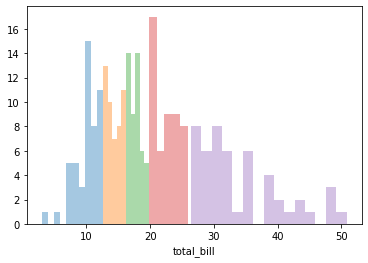

In [10]:
for i,j in zip(range(1,6),[10,5,5,5,15]):
    sns.distplot(tips[tips['total_bill eqfreq encode']==i]['total_bill'],kde=False,bins=j)

## Equal Interval

In [11]:
eqfreq = tips.pivot_table(
    index='total_bill eqint',
    aggfunc=len,
    values='tip')
eqfreq.columns=['freq']
eqfreq

,freq
total_bill eqint,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


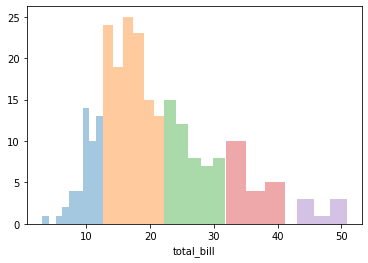

In [12]:
for i in range(1,6):
    sns.distplot(tips[tips['total_bill eqint encode']==i]['total_bill'],kde=False)

In [13]:
from sklearn.preprocessing import KBinsDiscretizer

In [14]:
disk = pd.read_csv('disk.csv')
disk

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1
...,...,...
1524,58,1
1525,64,1
1526,47,0
1527,26,1


In [15]:
disk['class'].value_counts()/disk.shape[0]/100 # proporsi hampir sama pada class 0 dan 1

1    0.005186
0    0.004814
Name: class, dtype: float64

kita dapat melakukan binning langsung pada variabel X, jika jumlah tidak sama harus dilakukan binning per kelas

In [16]:
disk['x eqint']=pd.cut(disk['x'],7) # membagi x dengan interval 7 tiap binnya
disk['x eqitv encode']=pd.cut(disk['x'],7,labels=range(1,8))

In [17]:
disk.head()

,x,class,x eqint,x eqitv encode
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [18]:
pd.crosstab(disk['x eqint'],disk['class'],normalize=0) # proporsi kelas 0 dan 1 pada setiap interval

class,0,1
x eqint,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


<AxesSubplot:xlabel='x eqint'>

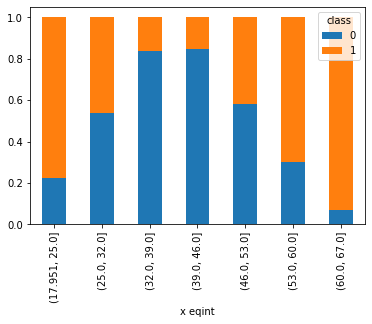

In [19]:
pd.crosstab(disk['x eqint'],disk['class'],normalize=0).plot(kind='bar',stacked=True)

setalah feature x dibagi sebanyak 7 kelas, terlihat ada pola dimana :
* proporsi kelas 1 menurun sampai dengan interval ke 4 kemudian naik sampai interval terakhir, menunjukan terdapa hubungan non linear dari X terhadap class

## Modelling without Binning

### Data Splitting

In [20]:
X = disk[['x']]
y = disk[['class']]

In [21]:
X_train,X_test,y_train,y_test = train_test_split (X,y,
                                                 stratify=y,
                                                 random_state=2020)

In [22]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [23]:
y_pred = log.predict(X_test)
print('akurasi skor sebelum binning=',accuracy_score(y_test,y_pred))

akurasi skor sebelum binning= 0.5822454308093995


## Modelling with Binning

In [24]:
discretize = KBinsDiscretizer()
discretize.fit(X_train)
X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [25]:
log = LogisticRegression()
log.fit(X_train_disc,y_train)
y_pred = log.predict(X_test_disc)
print('akurasi skor sebelum binning=',accuracy_score(y_test,y_pred))

akurasi skor sebelum binning= 0.6997389033942559


akurasi model setelah dilakukan binning meningkat dari 58.22 % menjadi 69.97 %